# Import modules and data

In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline


In [5]:
taxi_df_full = pd.read_csv('./data/taxi.csv')

In [6]:
taxi_df_full.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN


In [7]:
taxi_df_full.shape

(7667792, 18)

# Data exploration

In [8]:
taxi_df_full.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [9]:
taxi_df = taxi_df_full[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
                        'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 
                        'payment_type', 'total_amount']]

In [10]:
taxi_df[taxi_df.isnull()].sum()

tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count         0.00
trip_distance           0.00
RatecodeID              0.00
PULocationID            0.00
DOLocationID            0.00
payment_type            0.00
total_amount            0.00
dtype: object

In [11]:
taxi_df.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [12]:
taxi_df.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00
mean,1.57,2.80,1.06,165.50,163.75,1.29,15.68
std,1.22,3.74,0.68,66.39,70.36,0.47,262.29
min,0.00,0.00,1.00,1.00,1.00,1.00,-362.80
25%,1.00,0.90,1.00,130.00,113.00,1.00,8.19
50%,1.00,1.53,1.00,162.00,162.00,1.00,11.27
75%,2.00,2.80,1.00,234.00,234.00,2.00,16.56
max,9.00,831.80,99.00,265.00,265.00,4.00,623261.66


array([[<AxesSubplot: title={'center': 'passenger_count'}>,
        <AxesSubplot: title={'center': 'trip_distance'}>,
        <AxesSubplot: title={'center': 'RatecodeID'}>],
       [<AxesSubplot: title={'center': 'PULocationID'}>,
        <AxesSubplot: title={'center': 'DOLocationID'}>,
        <AxesSubplot: title={'center': 'payment_type'}>],
       [<AxesSubplot: title={'center': 'total_amount'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

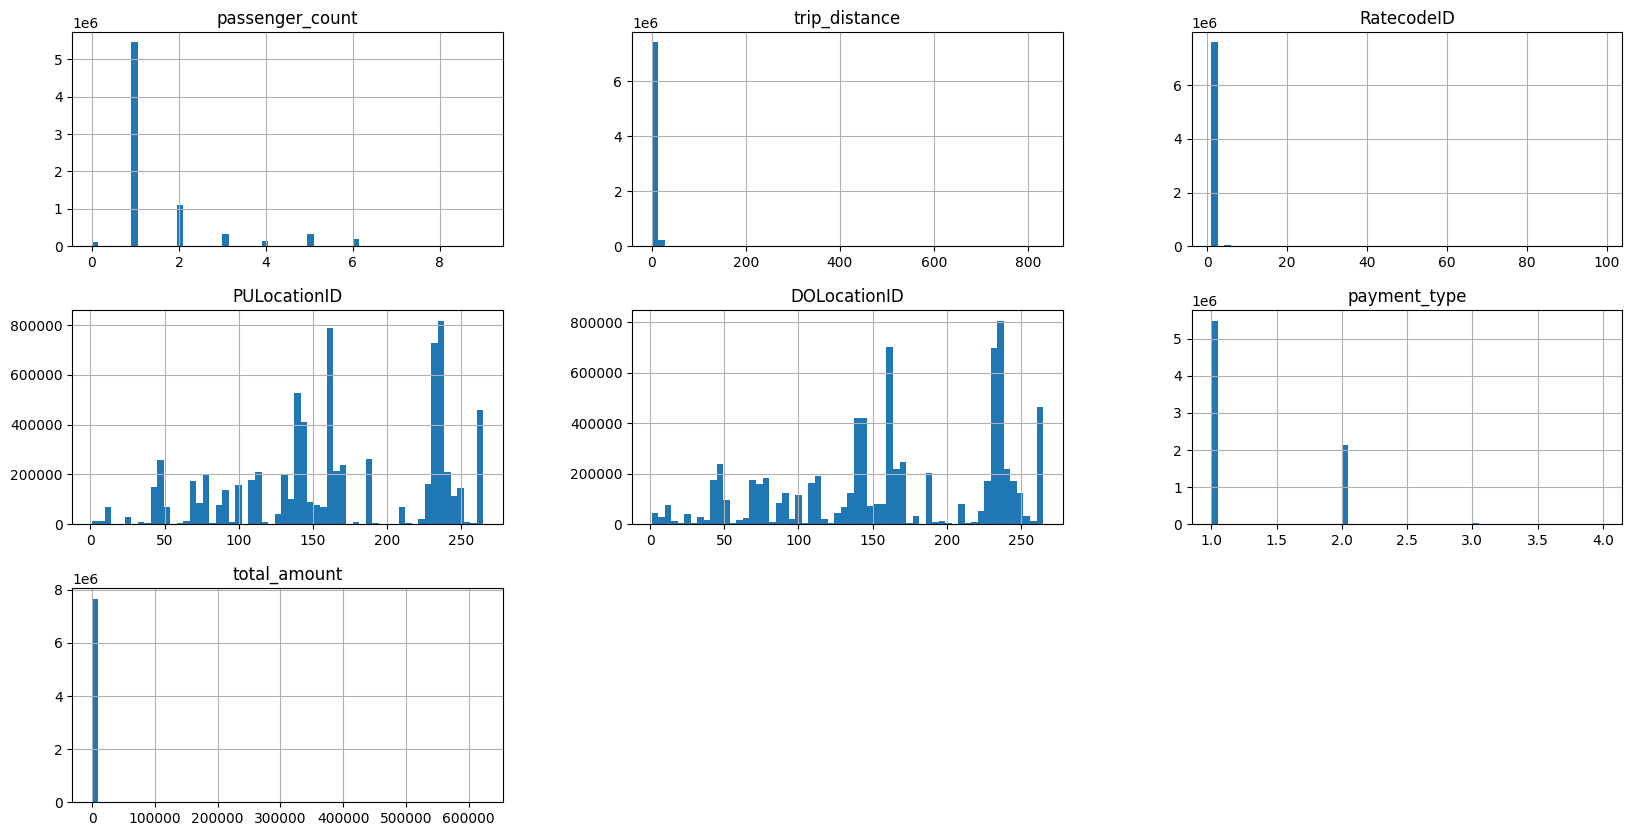

In [13]:
taxi_df.hist(figsize=(20,10), bins=60)

<AxesSubplot: xlabel='index', ylabel='total_amount'>

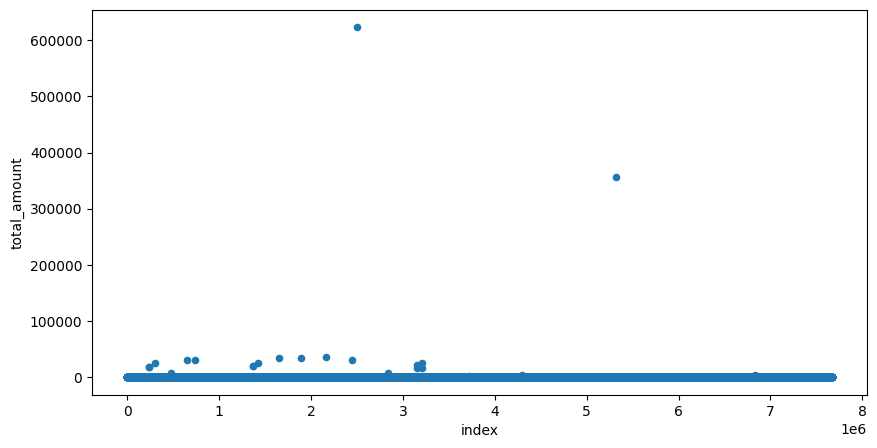

In [14]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<AxesSubplot: xlabel='index', ylabel='total_amount'>

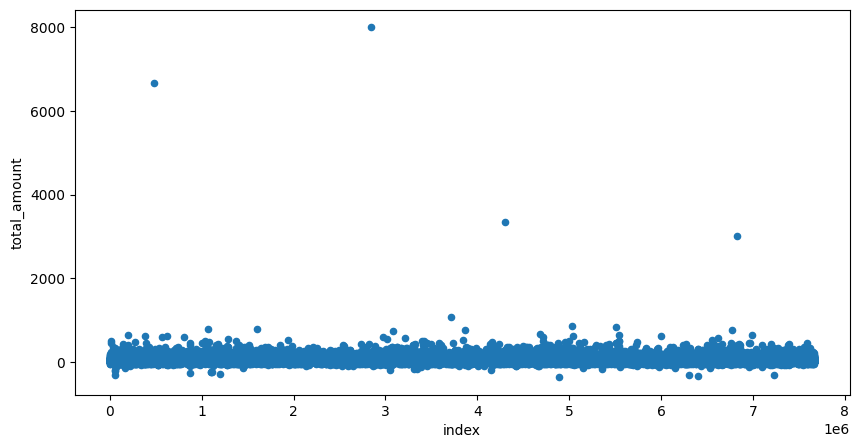

In [15]:
taxi_df[taxi_df['total_amount'] <= 15000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

(7131, 9)


<AxesSubplot: xlabel='index', ylabel='total_amount'>

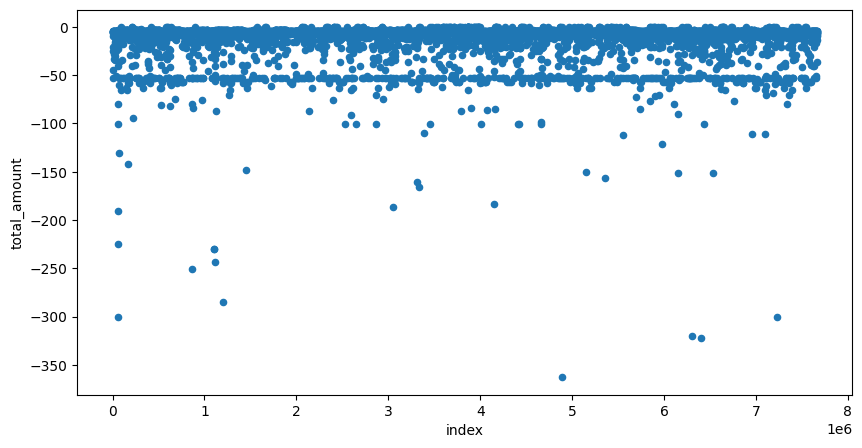

In [16]:
print(taxi_df[taxi_df['total_amount'] < 0].shape)

taxi_df[taxi_df['total_amount'] < 0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [17]:
taxi_df[taxi_df['total_amount'] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.80
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.30
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.80
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.80
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.30


In [18]:
taxi_df[taxi_df['total_amount'] <0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

In [19]:
taxi_df[taxi_df['total_amount'] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.80
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.30
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.80
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.80
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.30


<AxesSubplot: xlabel='index', ylabel='total_amount'>

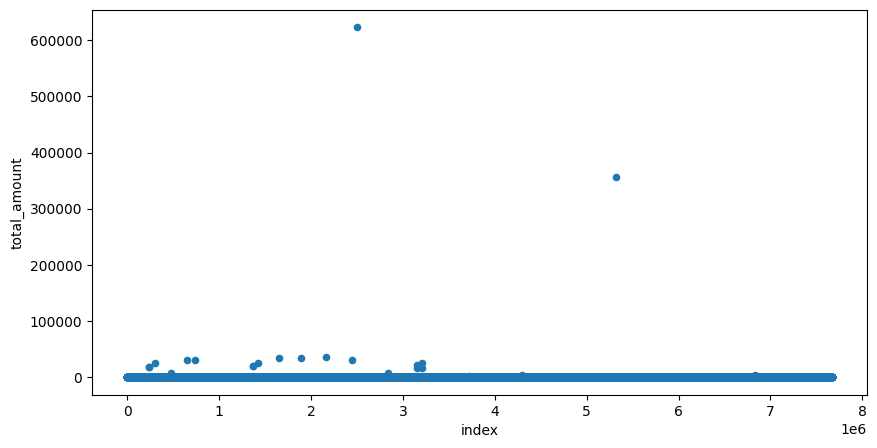

In [20]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [21]:
print(taxi_df[taxi_df['total_amount'] == 0].shape)
taxi_df[taxi_df['total_amount'] == 0].head()

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.00,5,186,264,2,0.00
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.00,5,246,264,2,0.00
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.00,1,193,193,1,0.00
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.00,1,7,7,2,0.00
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.00,1,264,7,2,0.00


<AxesSubplot: >

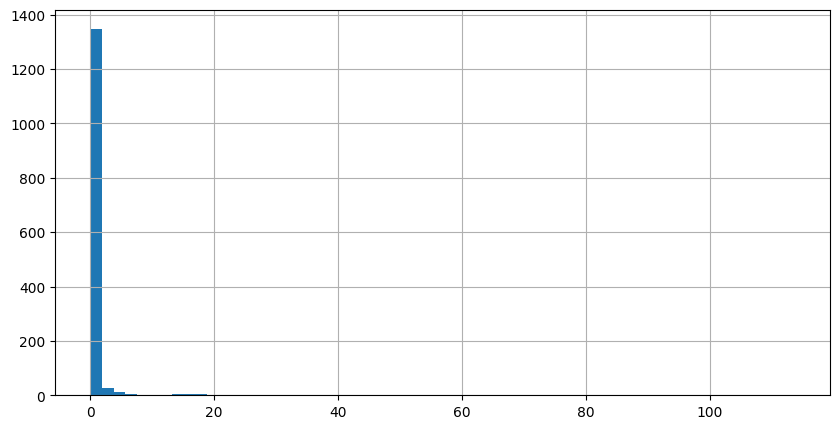

In [22]:
taxi_df[taxi_df['total_amount'] == 0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [23]:
taxi_df[taxi_df['total_amount'] == 0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

In [24]:
taxi_df[taxi_df['total_amount'] == 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.00,5,186,264,2,0.00
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.00,5,246,264,2,0.00
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.00,1,193,193,1,0.00
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.00,1,7,7,2,0.00
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.00,1,264,7,2,0.00


<AxesSubplot: xlabel='index', ylabel='total_amount'>

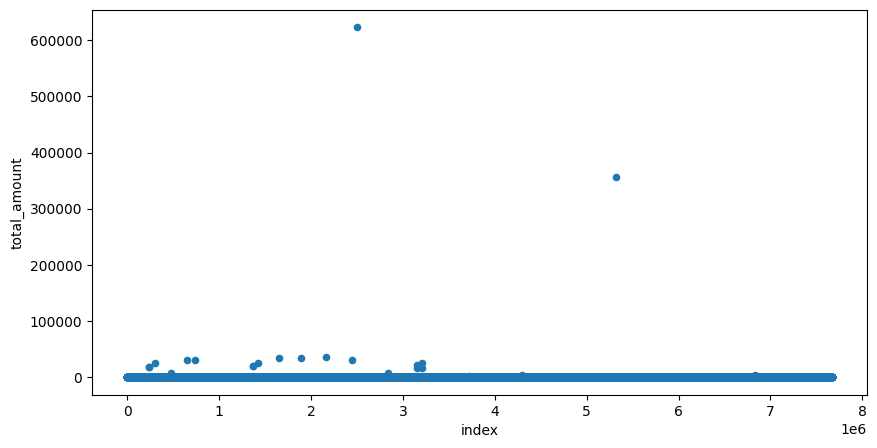

In [25]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [26]:
taxi_df[taxi_df['total_amount'] > 500].shape

(56, 9)

In [27]:
taxi_df[taxi_df['total_amount'] > 300].shape

(307, 9)

In [28]:
taxi_df[taxi_df['total_amount'] > 200].shape

(1166, 9)

In [29]:
taxi_df[taxi_df['total_amount'] > 100].shape

(10832, 9)

In [30]:
taxi_df['total_amount'].mean()

15.68222215991253

In [31]:
taxi_df['total_amount'].median()

11.27

In [32]:
taxi_df['total_amount'].max()

623261.66

# Data cleaning

In [33]:
taxi_df_filtered = taxi_df[(taxi_df['total_amount'] >= 0) & (taxi_df['total_amount'] < 200)]

In [34]:
print(taxi_df.shape)
taxi_df_filtered.shape

(7667792, 9)


(7659490, 9)

In [35]:
taxi_df_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# Data Preparation

In [36]:
taxi_df_prepared = taxi_df_filtered.copy()

In [37]:
taxi_df_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [38]:
taxi_df_prepared['tpep_pickup_datetime'] = pd.to_datetime(taxi_df_prepared['tpep_pickup_datetime'])
taxi_df_prepared['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df_prepared['tpep_dropoff_datetime'])

In [39]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [40]:
taxi_df_prepared['RatecodeID'] = taxi_df_prepared['RatecodeID'].astype(str)
taxi_df_prepared['PULocationID '] = taxi_df_prepared['PULocationID'].astype(str)
taxi_df_prepared['DOLocationID'] = taxi_df_prepared['DOLocationID'].astype(str)
taxi_df_prepared['payment_type'] = taxi_df_prepared['payment_type'].astype(str)

In [41]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                      int64
DOLocationID                     object
payment_type                     object
total_amount                    float64
PULocationID                     object
dtype: object

In [42]:
taxi_df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,PULocationID
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,151,239,1,9.95,151
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,239,246,1,16.30,239
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,236,236,1,5.80,236
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,193,193,2,7.55,193
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,193,193,2,55.55,193


In [43]:
taxi_df_prepared['transaction_date'] = pd.to_datetime(taxi_df_prepared['tpep_pickup_datetime'].dt.date)
taxi_df_prepared['transaction_year'] = taxi_df_prepared['tpep_pickup_datetime'].dt.year
taxi_df_prepared['transaction_month'] = taxi_df_prepared['tpep_pickup_datetime'].dt.month
taxi_df_prepared['transaction_day'] = taxi_df_prepared['tpep_pickup_datetime'].dt.day
taxi_df_prepared['transaction_hour'] = taxi_df_prepared['tpep_pickup_datetime'].dt.hour

In [44]:
taxi_df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,PULocationID,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,151,239,1,9.95,151,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,239,246,1,16.30,239,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,236,236,1,5.80,236,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,193,193,2,7.55,193,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,193,193,2,55.55,193,2018-11-28,2018,11,28,15


array([[<AxesSubplot: title={'center': 'tpep_pickup_datetime'}>,
        <AxesSubplot: title={'center': 'tpep_dropoff_datetime'}>,
        <AxesSubplot: title={'center': 'passenger_count'}>],
       [<AxesSubplot: title={'center': 'trip_distance'}>,
        <AxesSubplot: title={'center': 'PULocationID'}>,
        <AxesSubplot: title={'center': 'total_amount'}>],
       [<AxesSubplot: title={'center': 'transaction_date'}>,
        <AxesSubplot: title={'center': 'transaction_year'}>,
        <AxesSubplot: title={'center': 'transaction_month'}>],
       [<AxesSubplot: title={'center': 'transaction_day'}>,
        <AxesSubplot: title={'center': 'transaction_hour'}>,
        <AxesSubplot: >]], dtype=object)

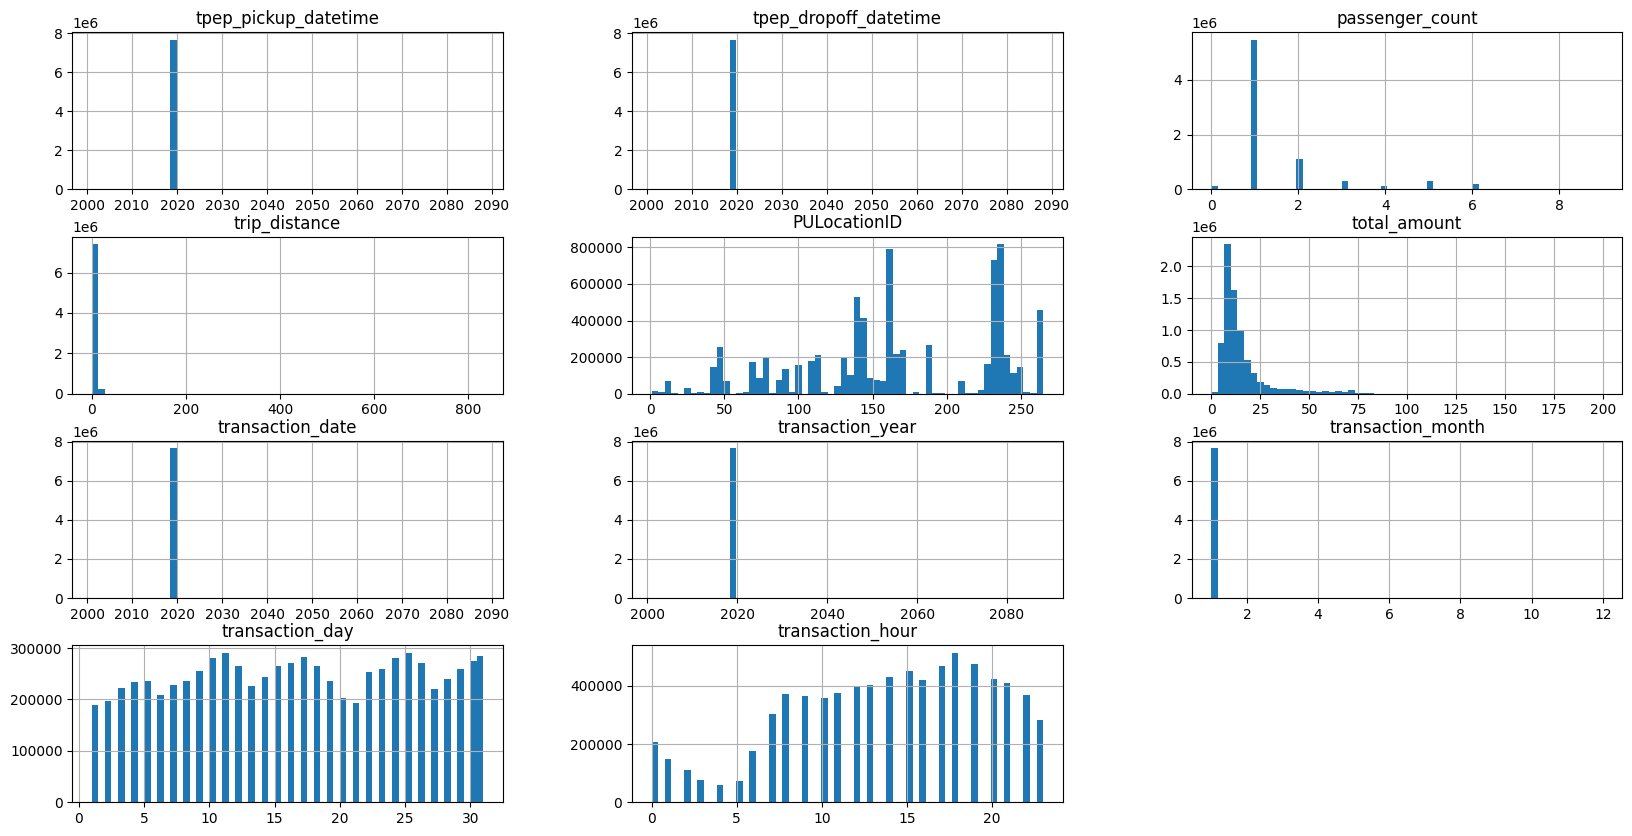

In [45]:
taxi_df_prepared.hist(figsize=(20,10), bins=60)

In [46]:
taxi_df_prepared = taxi_df_prepared[taxi_df_prepared['transaction_year'] == 2019]
taxi_df_prepared = taxi_df_prepared[taxi_df_prepared['transaction_month'] == 1]

array([[<AxesSubplot: title={'center': 'tpep_pickup_datetime'}>,
        <AxesSubplot: title={'center': 'tpep_dropoff_datetime'}>,
        <AxesSubplot: title={'center': 'passenger_count'}>],
       [<AxesSubplot: title={'center': 'trip_distance'}>,
        <AxesSubplot: title={'center': 'PULocationID'}>,
        <AxesSubplot: title={'center': 'total_amount'}>],
       [<AxesSubplot: title={'center': 'transaction_date'}>,
        <AxesSubplot: title={'center': 'transaction_year'}>,
        <AxesSubplot: title={'center': 'transaction_month'}>],
       [<AxesSubplot: title={'center': 'transaction_day'}>,
        <AxesSubplot: title={'center': 'transaction_hour'}>,
        <AxesSubplot: >]], dtype=object)

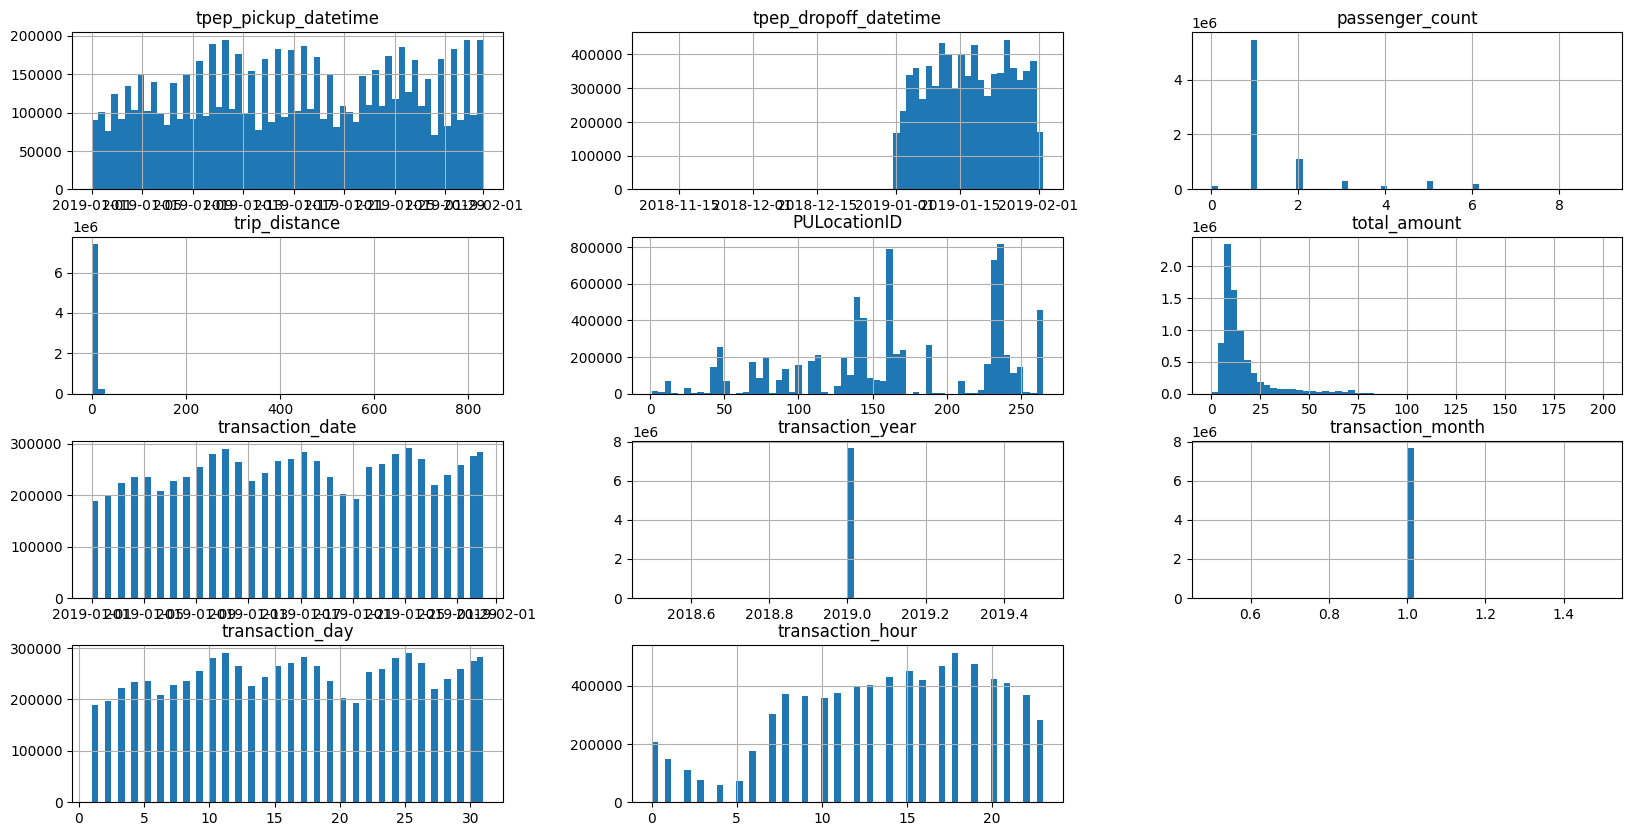

In [47]:
taxi_df_prepared.hist(figsize=(20,10), bins=60)

In [66]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns =  categorical_columns + numerical_columns

In [67]:
main_taxi_df = taxi_df_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.50,9.95
1,239,2019-01-01,1,1,0,2.60,16.30
7,163,2019-01-01,1,1,0,1.30,9.05
8,229,2019-01-01,1,1,0,3.70,18.50
9,141,2019-01-01,1,1,0,2.10,13.00


In [68]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] =  main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.00,21.80,1
1,1,2019-01-01,1,1,5,0.00,87.30,1
2,1,2019-01-01,1,1,6,0.00,80.30,1
3,1,2019-01-01,1,1,8,0.00,128.58,2
4,1,2019-01-01,1,1,10,16.90,43.25,4


<AxesSubplot: >

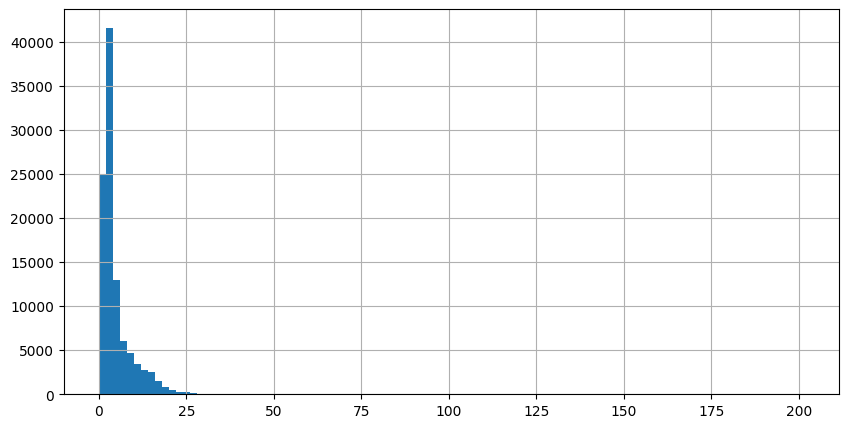

In [71]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(10,5))

<AxesSubplot: >

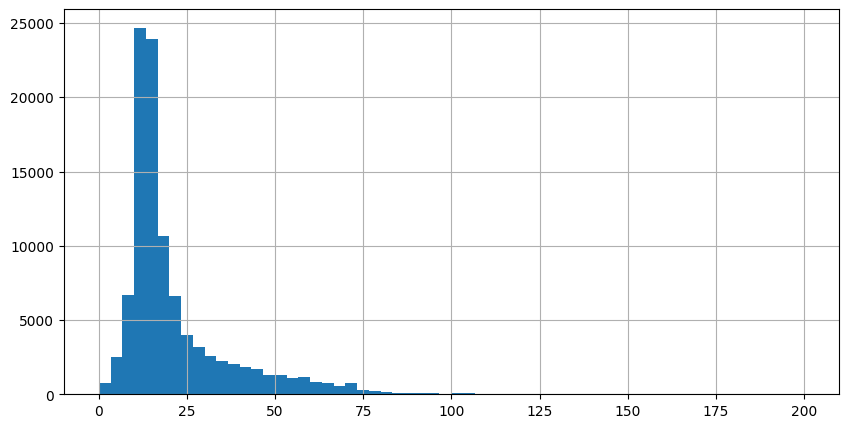

In [72]:
taxi_grouped_by_region['total_amount'].hist(bins=60, figsize=(10,5))

# Benchmark Models

In [73]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [74]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

In [101]:
from sklearn.model_selection  import train_test_split

X_bench = data_for_benchmark_model[categorical_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b,  y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)


In [102]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)

tree.fit(X_train_b, y_train_b)


DecisionTreeRegressor(max_depth=10)

In [103]:
model_at_hand = tree

y_predict_b = model_at_hand.predict(X_test_b)

In [104]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean absolute error = ', mean_absolute_error(y_predict_b, y_test_b))
print('mean squared error = ', mean_squared_error(y_predict_b, y_test_b))
print('root mean square error = ', sqrt(mean_squared_error(y_predict_b, y_test_b)))
print('r2 score = ', r2_score(y_predict_b, y_test_b))


mean absolute error =  8.642270525957365
mean squared error =  198.97677815302006
root mean square error =  14.105912879109244
r2 score =  -1.0568685624247105


<AxesSubplot: xlabel='true', ylabel='pred'>

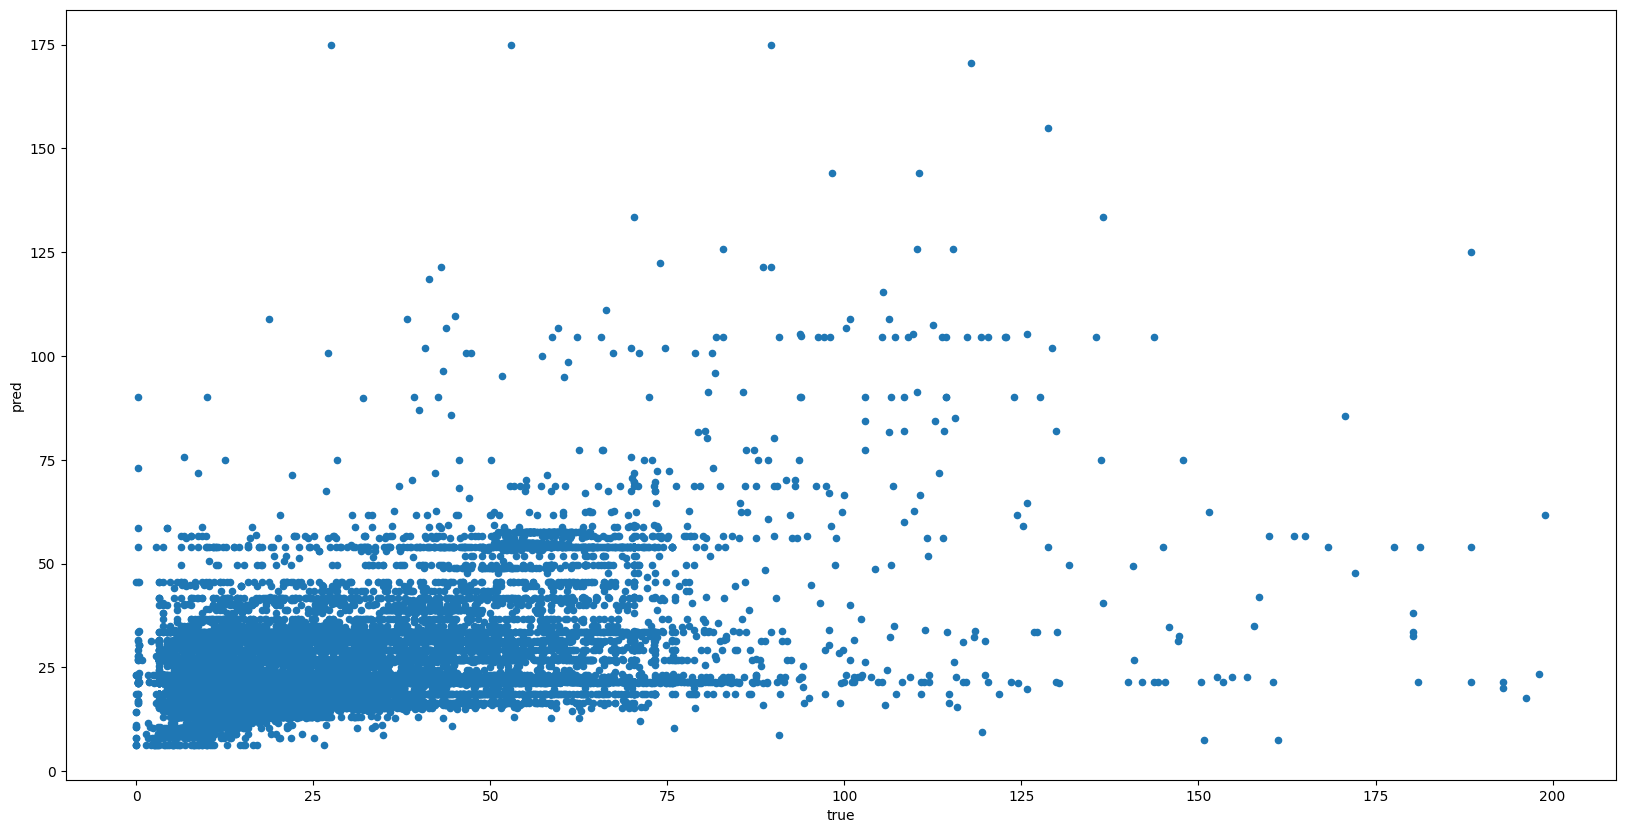

In [105]:
data = {'true': y_test_b, 'pred': y_predict_b}
results = pd.DataFrame(data)

results.plot(kind='scatter', x='true', y='pred', figsize=(20,10))

# Feature engineering